## Read and Visualize the Data

In [257]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [258]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [259]:
# basics of the df
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [260]:
country_df.shape

(167, 10)

In [261]:
# missing values
round(100*(country_df.isnull().sum())/len(country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## Data Preparation

In [262]:
#calculating the actual value of exports
country_df['exports']= (country_df['exports']*country_df['gdpp'])/100

In [263]:
#calculating the actual value of health
country_df['health']= (country_df['health']*country_df['gdpp'])/100

In [264]:
#calculating the actual value of imports
country_df['imports']= (country_df['imports']*country_df['gdpp'])/100

In [265]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Performing EDA 

In [266]:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

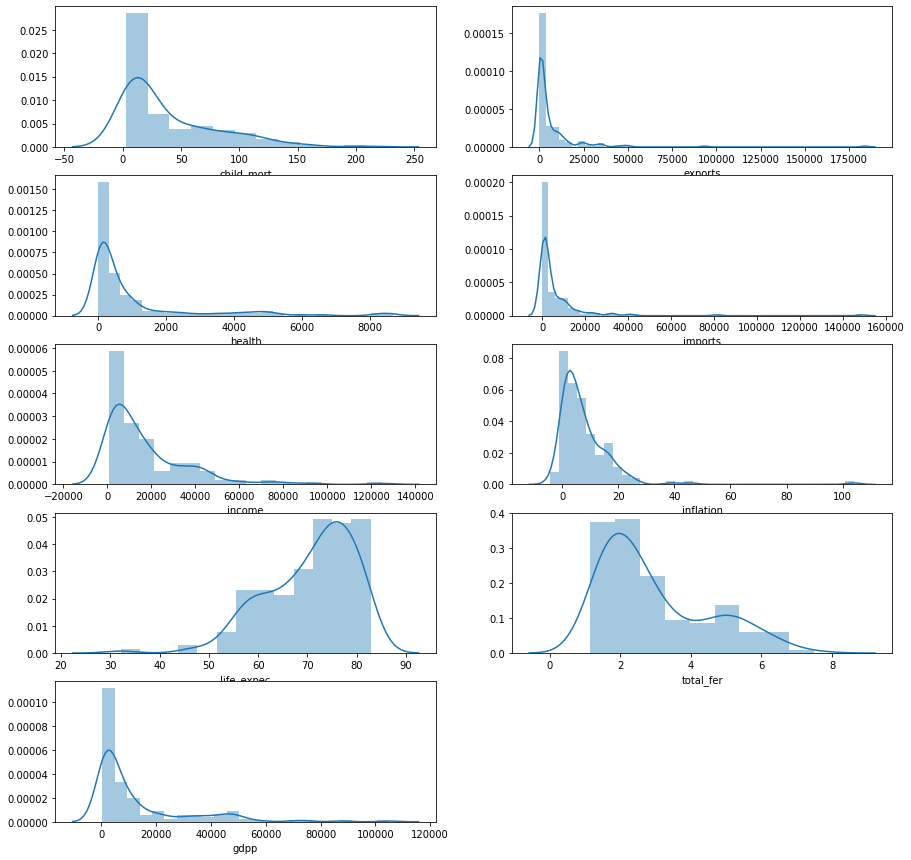

In [267]:
plt.figure(figsize = (15, 15))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(country_df[i[1]])

#### We will be dealing with "child_mort", "income" and "gdpp" columns as you can see they show an interesting pattern

## Outlier treatment

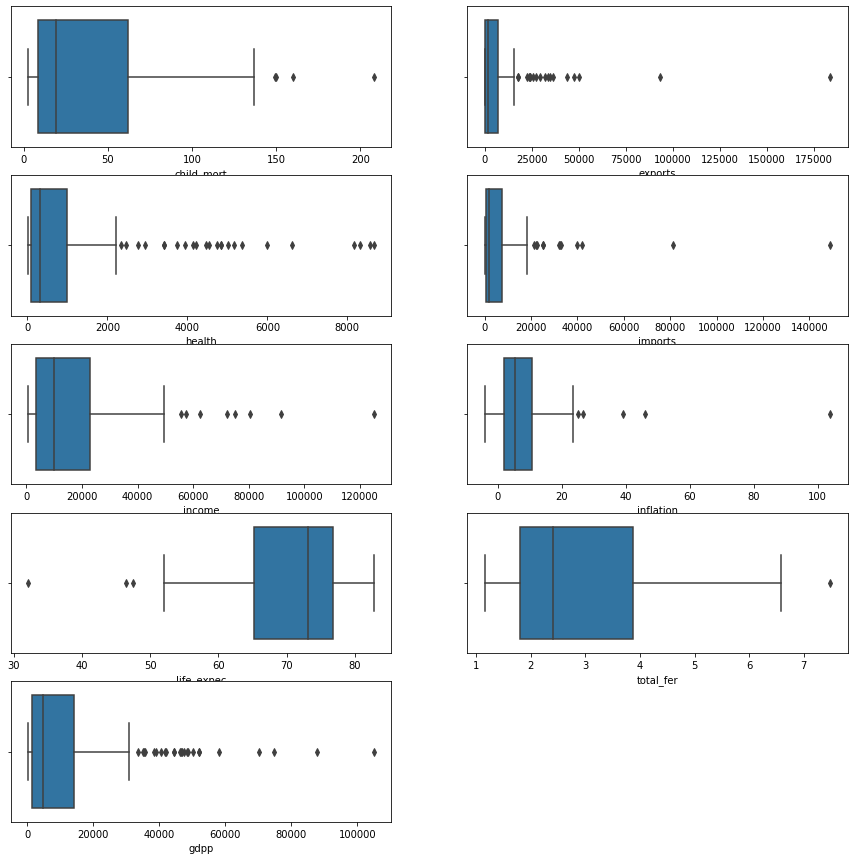

In [268]:
plt.figure(figsize = (15, 15))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(country_df[i[1]])

### Capping the outliers

In [269]:
country_df['exports'].describe()

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
max      183750.000000
Name: exports, dtype: float64

In [270]:
# Capping the values of exports column
q4 = country_df['exports'].quantile(0.99)

country_df['exports'][country_df['exports']>=q4]=q4

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [271]:
country_df['health'].describe()

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: float64

In [272]:
# Capping the values of health column
q4 = country_df['health'].quantile(0.99)

country_df['health'][country_df['health']>=q4]=q4

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [273]:
country_df['imports'].describe()

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
max      149100.000000
Name: imports, dtype: float64

In [274]:
# Capping the values of imports column
q4 = country_df['imports'].quantile(0.99)

country_df['imports'][country_df['imports']>=q4]=q4

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [275]:
country_df['income'].describe()

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
max      125000.000000
Name: income, dtype: float64

In [276]:
# Capping the values of income column
q4 = country_df['income'].quantile(0.99)

country_df['income'][country_df['income']>=q4]=q4

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [277]:
country_df['inflation'].describe()

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
max      104.000000
Name: inflation, dtype: float64

In [278]:
# Capping the values of inflation column
q4 = country_df['inflation'].quantile(0.99)

country_df['inflation'][country_df['inflation']>=q4]=q4

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [279]:
country_df['life_expec'].describe()

count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
max       82.800000
Name: life_expec, dtype: float64

In [280]:
# Capping the values of life_expec column
q1 = country_df['life_expec'].quantile(0.01)

country_df['life_expec'][country_df['life_expec']<=q1]=q1

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [281]:
country_df['gdpp'].describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

In [282]:
# Capping the values of gdpp column
q4 = country_df['gdpp'].quantile(0.99)

country_df['gdpp'][country_df['gdpp']>=q4]=q4

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [283]:
country_df['child_mort'].describe()

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: float64

In [284]:
# Capping the values of child_mort column
q4 = country_df['child_mort'].quantile(0.99)

country_df['child_mort'][country_df['child_mort']>=q4]=q4

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [285]:
country_df['total_fer'].describe()

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
max        7.490000
Name: total_fer, dtype: float64

In [286]:
# Capping the values of total_fer column
q4 = country_df['total_fer'].quantile(0.99)

country_df['total_fer'][country_df['total_fer']>=q4]=q4

C:\Users\acer\anaconda_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


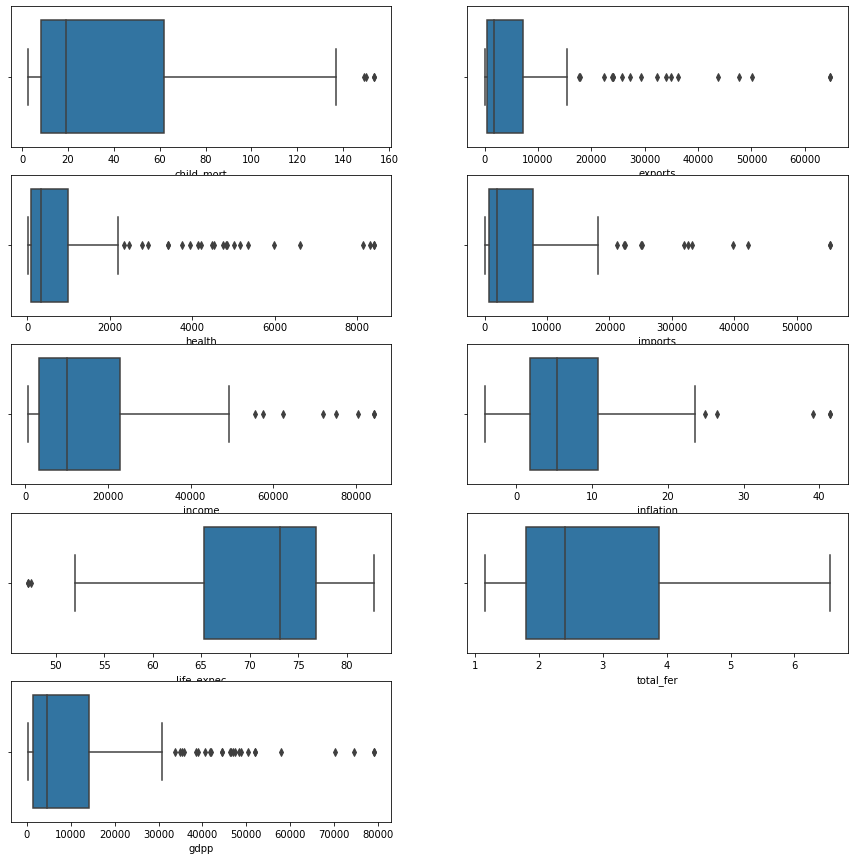

In [287]:
plt.figure(figsize = (15, 15))
feature = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(country_df[i[1]])

## Scaling

In [288]:
country_df1 = country_df.copy()

In [289]:
country_df1.drop('country', axis = 1, inplace = True)

In [290]:
scale = StandardScaler()
country_df_scaled = scale.fit_transform(country_df1)

In [291]:
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.693071,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.662026,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.685460,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.236112,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.720610,-0.543736,-0.032042


### Hopkins score

In [292]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [293]:
hopkins(country_df_scaled)

0.8828025609345324

#### Elbow curve

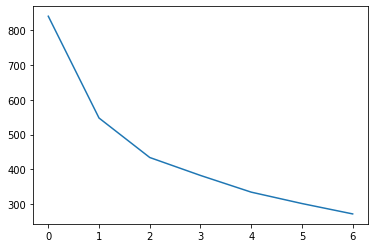

In [294]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### Silhouette analysis

In [295]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46943108916984133
For n_clusters=3, the silhouette score is 0.4069661349025314
For n_clusters=4, the silhouette score is 0.3952110775478241
For n_clusters=5, the silhouette score is 0.38572408188338825
For n_clusters=6, the silhouette score is 0.299054980977818
For n_clusters=7, the silhouette score is 0.31176369049977065
For n_clusters=8, the silhouette score is 0.2747713456226155


#### Running Kmean with 3

In [296]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(country_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [297]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [298]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [299]:
# assign the label
country_df['cluster_id'] = kmeans.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


## Cluster Profiling for KMeans

In [300]:
country_df2= country_df.drop(['exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1)
country_df2.head()

,country,child_mort,income,gdpp,cluster_id
0,Afghanistan,90.2,1610.0,553.0,0
1,Albania,16.6,9930.0,4090.0,2
2,Algeria,27.3,12900.0,4460.0,2
3,Angola,119.0,5900.0,3530.0,0
4,Antigua and Barbuda,10.3,19100.0,12200.0,2


In [301]:
country_df2.cluster_id.value_counts()

2    90
0    48
1    29
Name: cluster_id, dtype: int64

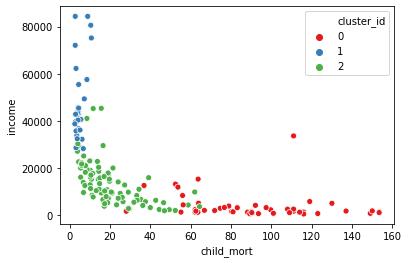

In [302]:
sns.scatterplot(x = "child_mort" , y = "income", hue = 'cluster_id', data = country_df2, palette = "Set1")

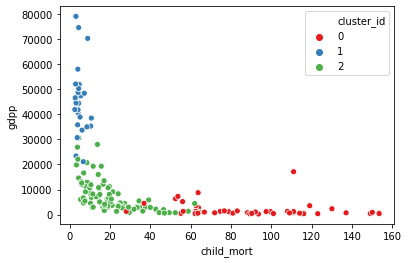

In [303]:
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'cluster_id', data = country_df2, palette = "Set1")

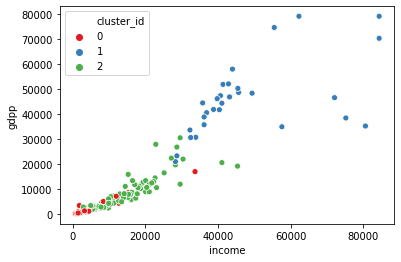

In [304]:
sns.scatterplot(x = "income" , y = "gdpp", hue = 'cluster_id', data = country_df2, palette = "Set1")

#### From the above scatter plots it can be clearly seen that Cluster 0 countries have low gdpp, low income and high child mortality. Where as the cluster 1 countries have the highest income, highest gdpp and lowest child mortality. So the aid must be provided to the cluster 0 countries.

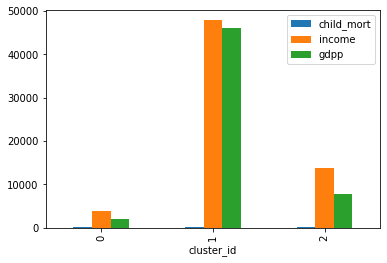

In [305]:
country_df2[['child_mort', 'income', 'gdpp', 'cluster_id']].groupby("cluster_id").mean().plot(kind = 'bar')

#### From the above plot it is also visible the Cluster 0 countries needs the aid

In [306]:
country_df2[country_df2['cluster_id']==0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

,country,child_mort,income,gdpp,cluster_id
132,Sierra Leone,153.4,1220.0,399.0,0
66,Haiti,153.4,1500.0,662.0,0
32,Chad,150.0,1930.0,897.0,0
31,Central African Republic,149.0,888.0,446.0,0
97,Mali,137.0,1870.0,708.0,0
113,Nigeria,130.0,5150.0,2330.0,0
112,Niger,123.0,814.0,348.0,0
3,Angola,119.0,5900.0,3530.0,0
37,"Congo, Dem. Rep.",116.0,609.0,334.0,0
25,Burkina Faso,116.0,1430.0,575.0,0


#### According to K-Means Clustering, the countries which are in direst need of the aid are Sierra Leone, Haiti, Chad, Central African Republic, Mali, Nigeria, Niger, Angola, Congo and Burkina Faso. These are the 10 countries which have the lowest income, lowest gdpp and highest child mortality.

# Hierarchical clustering

In [307]:
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.693071,1.926396,-0.702259
1,-0.547497,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.662026,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.685460,-0.034983,-0.477434
3,2.084159,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.236112,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.720610,-0.543736,-0.032042


In [308]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


### Single Linkage

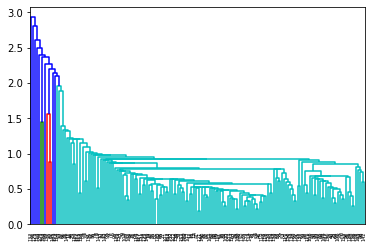

In [309]:
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete linkage

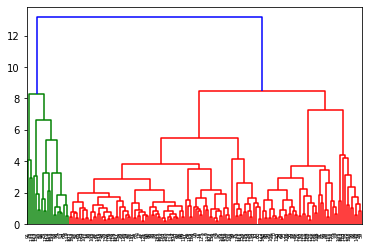

In [310]:
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [311]:
# Choosing cluster as 3
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [312]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


## Cluster Profiling for Hierarchical

In [313]:
country_df3= country_df.drop(['exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer'], axis = 1)
country_df3.head()

,country,child_mort,income,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,1610.0,553.0,0,0
1,Albania,16.6,9930.0,4090.0,2,1
2,Algeria,27.3,12900.0,4460.0,2,1
3,Angola,119.0,5900.0,3530.0,0,0
4,Antigua and Barbuda,10.3,19100.0,12200.0,2,1


In [314]:
country_df3.cluster_labels.value_counts()

1    96
0    50
2    21
Name: cluster_labels, dtype: int64

#### Visualisation

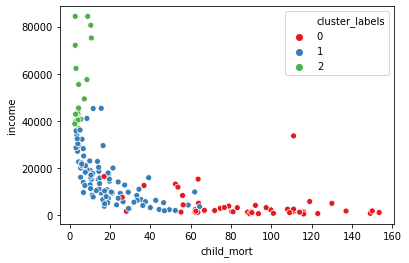

In [315]:
sns.scatterplot(x = "child_mort" , y = "income", hue = 'cluster_labels', data = country_df3, palette = "Set1")

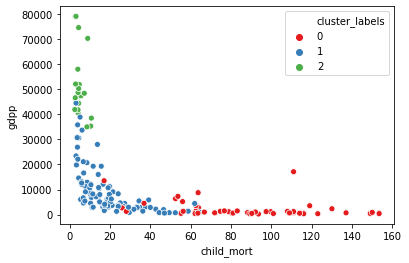

In [316]:
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'cluster_labels', data = country_df3, palette = "Set1")

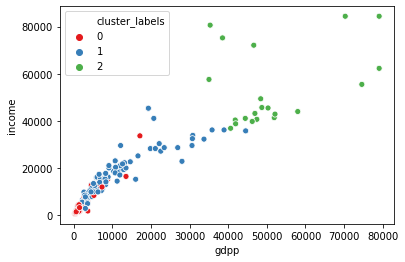

In [317]:
sns.scatterplot(x = "gdpp" , y = "income", hue = 'cluster_labels', data = country_df3, palette = "Set1")

#### Cluster0- low income, low gdpp, high mortality
#### Cluster1- midranged income,gdpp and child mortality
#### Cluster2- high income, high gdpp and low child mortality

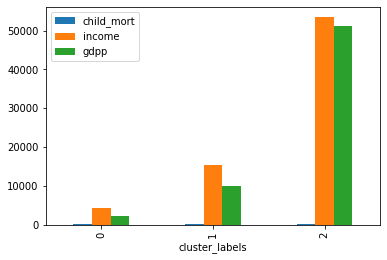

In [318]:
country_df3[['child_mort', 'income', 'gdpp', 'cluster_labels']].groupby("cluster_labels").mean().plot(kind = 'bar')

#### The mean plot of the clusters shows that the Cluster 0 has the lowest income,lowest gdpp and highest child mortality wheres as the Cluster 2 has the highest gdpp, income and lowest child mortality

In [319]:
country_df3[country_df3['cluster_labels']==0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

,country,child_mort,income,gdpp,cluster_id,cluster_labels
132,Sierra Leone,153.4,1220.0,399.0,0,0
66,Haiti,153.4,1500.0,662.0,0,0
32,Chad,150.0,1930.0,897.0,0,0
31,Central African Republic,149.0,888.0,446.0,0,0
97,Mali,137.0,1870.0,708.0,0,0
113,Nigeria,130.0,5150.0,2330.0,0,0
112,Niger,123.0,814.0,348.0,0,0
3,Angola,119.0,5900.0,3530.0,0,0
37,"Congo, Dem. Rep.",116.0,609.0,334.0,0,0
25,Burkina Faso,116.0,1430.0,575.0,0,0


#### According to hierarchical clustering the 10 countries that needs the aid most are Sierra Leone, Haiti, Chad, Central African Republic, Mali, Nigeria, Niger, Angola, Congo and Burkina Faso.

#### So it is observed the 10 countries are same which came out as a result of both Kmeans and Hierarchical clustering.

#### These 10 countries have the highest child mortality and lowest income as well as gdpp. So they will need the aid more than any other countries.